# Hands-on: The Perceptron class with serialization

The perceptron is a primitive neural network that weights its input linearly, and outputs +1 or -1 depending on results.

This notebook provides a set of functions that define a fully functioning perceptron.

We want to remove any existing smell!

In [1]:
%matplotlib inline

import json

import matplotlib.pyplot as plt
import numpy as np

## Perceptron definition

The following functions are all that is needed to create, train, and use a perceptron.

In [2]:
class Perceptron:
    def __init__(self, bias, weights):
        self.bias = bias
        self.weights = weights

    @classmethod
    def random_params(cls, n_features, random_state=np.random):
        bias = 0.0
        weights = random_state.randn(n_features) * 0.001
        return cls(bias, weights)

    def update(self, learning_rate, X, y):
        """ Single update to the perceptron to perdict target `y` from input `X`.

        Returns
        -------
        cost: float
            Current training sum-of-squares error cost.
        """
        # Compute activation with current parameters, and compute the error.
        output = self.activation(X)
        errors = y - output

        # Update parameters to improve prediction.
        self.weights = self.weights + learning_rate * X.T.dot(errors)
        self.bias = self.bias + learning_rate * errors.sum()

        # Measure sum-of-squares error cost.
        cost = (errors ** 2).sum() / 2.0
        return cost
    
    def activation(self, X):
        """ Compute linear activation for output layer. """
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        """ Predict class label from input `X`. """
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    @classmethod
    def from_json(cls, json_str):
        params = json.loads(json_str)
        params['weights'] = np.array(params['weights'])
        return cls(**params)
    
    def to_json(self):
        params = {
            'bias': self.bias,
            'weights': self.weights.tolist(),
        }
        return json.dumps(params)


def fixed_rate_training(perceptron, learning_rate, n_iterations, X, y):
    """ Train a perceptron to perdict target `y` from input `X`. 
    
    Use a fixed training rate.
    """

    costs = []
    for idx in range(n_iterations):
        cost = perceptron.update(learning_rate, X, y)
        costs.append(cost)
    return costs

## Example use of the perceptron 

We load the "Iris" dataset, where we need to predict the species of an Iris flower based on the petal and sepal length and witdth.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

# A few uninteresting steps to reduce the problem to 2 species, and recode the target labels to +1 and -1
two_classes_mask = iris.target < 2
X = iris.data[two_classes_mask]
y = iris.target[two_classes_mask]
y[y==0] = -1

We split the data in a training and test set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=678)

Next we train a perceptron to predict the Iris species.

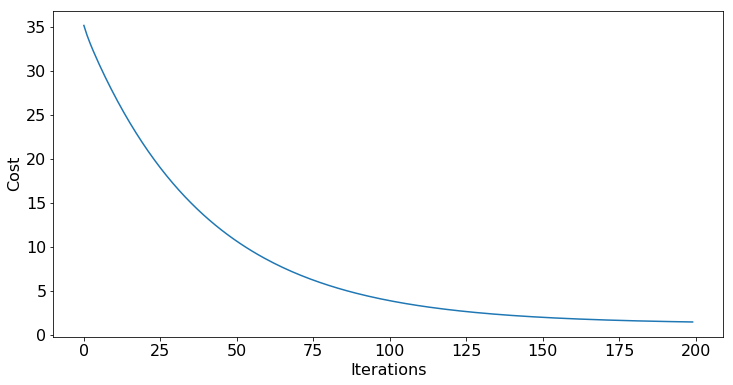

In [5]:
random_state = np.random.RandomState(783838)

perceptron = Perceptron.random_params(n_features=X.shape[1], random_state=random_state)

learning_rate = 0.0001
n_iterations = 200
costs = fixed_rate_training(perceptron, learning_rate, n_iterations, X_train, y_train)

with plt.rc_context(rc={'figure.figsize': (12, 6), 'font.size': 16}):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

In [6]:
# Save perceptron
with open('perceptron.json', 'w') as f:
    f.write(perceptron.to_json())

In [7]:
# Reload perceptron
with open('perceptron.json', 'r') as f:
    json_str = f.read()
    reloaded = Perceptron.from_json(json_str)

Finally, we predict use the perceptron to predict the species for the test data, and plot the results.

We plot a green circle around a point if it was predicted correctly, and a red one if not.

In [10]:
predicted = reloaded.predict(X_test)
correct = predicted == y_test
print('Number of errors:', len(y_test) - correct.sum())


Number of errors: 0


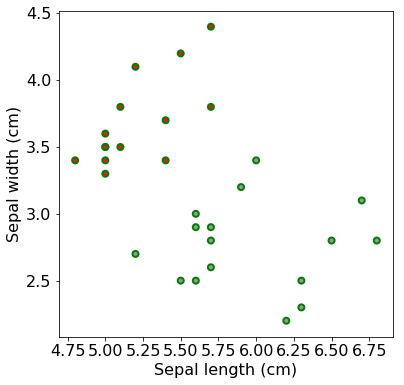

In [11]:
marker = np.where(correct, 'o', 'x')
with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], 
                cmap=plt.cm.Set1, marker='o', edgecolors='g', linewidths=2.0)
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())

    plt.scatter(X_test[~correct, 0], X_test[~correct, 1], c=y_test[~correct], 
                marker='o', edgecolors='r')
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())
